Imports


In [1]:
#***** Imports*******************
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

Cargar datos

In [2]:
#*** cargar ***
df_data = pd.read_csv('./Dry_Bean.csv')
df_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


Análisis exploratorio


In [3]:
#*** Ver las clases ***
df_data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [4]:
#*** Resumen variables numéricas ***
df_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Limpieza de datos

In [5]:
# *** Eliminar duplicados ***
df_data.drop_duplicates(inplace = True)

In [6]:
# *** Eiminar nulos ***

#Compruebo nulos
df_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


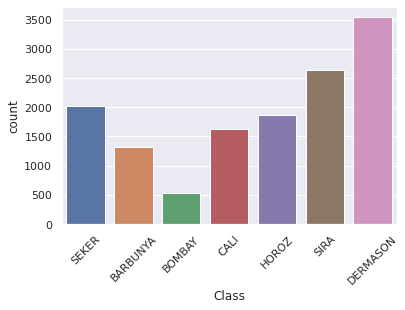

In [7]:
# *** Undersampling ***

#Comprobar si dataset es balanceado o no
sns.countplot(df_data.Class)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Importo RamdomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [9]:
# Instancio RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [10]:
# Separo datos entre target vs otrasFeatures
x = df_data.drop('Class', axis=1)

y = df_data['Class']

In [11]:
# Hago undersample
x_over, y_over = undersample.fit_resample(x,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


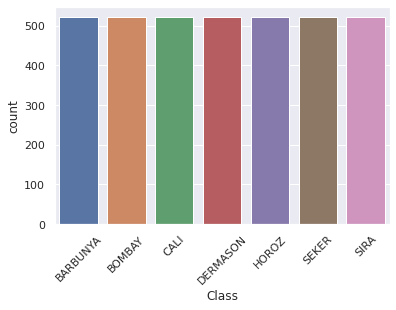

In [12]:
# Valido undersample
sns.countplot(y_over)
plt.xticks(rotation=45)
plt.show()

In [13]:
# Compruebo lo eliminado
print(df_data.shape) #antes
print(x_over.shape) #despues

(13543, 17)
(3654, 16)


In [14]:
# *** Target categórico a numérico ***

#saco los labels categóricos
categorical = list(np.unique(y_over))
categorical

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [15]:
#saco los labels numéricos
numerical = list(range(1,8))
numerical

[1, 2, 3, 4, 5, 6, 7]

In [16]:
#remplazo labels categóricos con numéricos
y_over.replace(categorical, numerical, inplace = True)
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

# Análisis exploratorio de datos

---



Análisis de correlación



In [17]:
#*** Para análisis conjunto, junto nuevamente x, y ***
df_data_dea = x_over #x
df_data_dea['Class'] = y_over #agrgo y en 'Class'

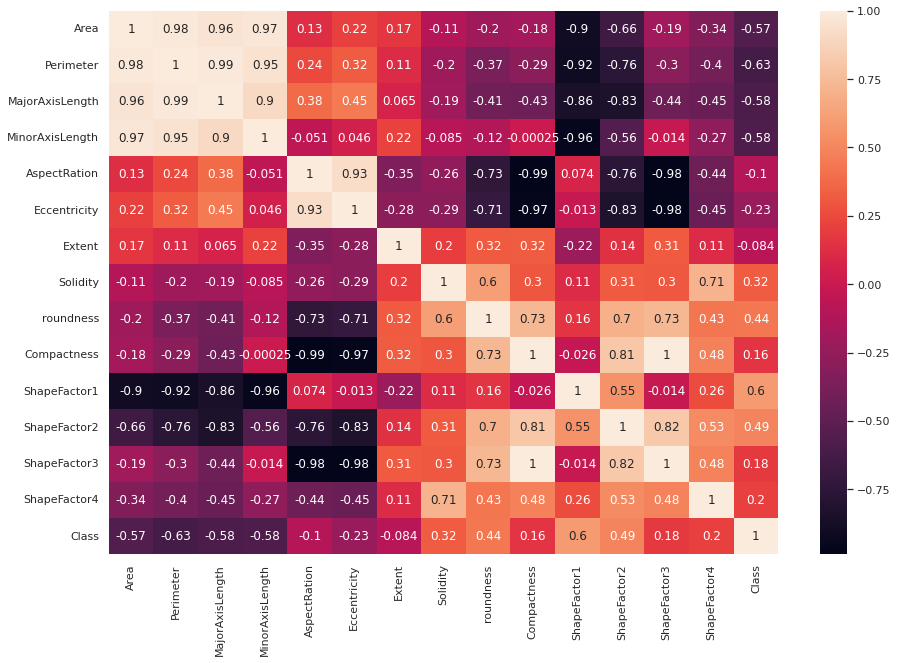

In [21]:
# *** Heat Map de correlaciones ***
plt.figure(figsize=(15,10))
sns.heatmap(df_data_dea.corr(), annot=True)
plt.show()

In [19]:
# *** Elimino features correlacionados  ***
x_over.drop(['ConvexArea', 'EquivDiameter'], axis = 1, inplace = True)

Visulaización de datos

KeyboardInterrupt: ignored

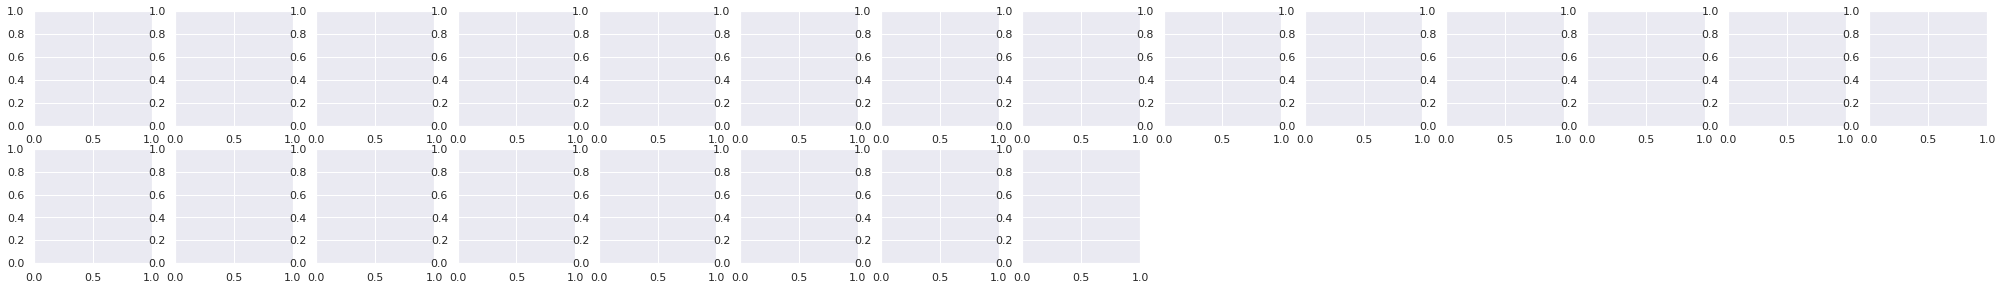

In [20]:
# *** Diagramas de Dispersión 3D features vs target ***
sns.pairplot(df_data_dea, hue='Class')

# Split y escalamiento de datos

---



Separo

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=42, shuffle = True)

Escalar datos

In [23]:
# *** Escaler estándar ***
st_scaler = StandardScaler() #Creo instancia del scaler
x_train = st_scaler.fit_transform(x_train) # escalo train
x_test = st_scaler.transform(x_test) #transformo test

x_train

array([[-0.47535941, -0.58898112, -0.71069092, ...,  1.36338165,
         0.82630202,  0.99463917],
       [-0.57886074, -0.75060656, -0.96254295, ...,  2.2959553 ,
         0.68576989,  0.99463917],
       [-0.24351988,  0.02429168,  0.2822926 , ..., -1.61159888,
         0.50951351,  0.49085641],
       ...,
       [ 2.40562959,  2.35892955,  2.51267856, ..., -0.97503751,
        -2.8199477 , -1.02049186],
       [-0.64467408, -0.694613  , -0.69456244, ...,  0.01058295,
        -0.0741258 ,  1.49842193],
       [-0.51778543, -0.52164224, -0.49062357, ..., -0.13873438,
        -0.75585026,  1.49842193]])

# Modelo regresión Multiclase

---



Creo función que devuleve/crea un objeto de modelo

In [24]:
#recibe las configuraciones como parámetors

def logistic_model(C_, solver_, multiclass_):
  model = LogisticRegression(random_state = 42, solver = solver_, multi_class = multiclass_, n_jobs = -1, C = C_)
  return model

Instancio el modelo, lo entreno, hago predicción y valido rápidamente el mejor

In [25]:
#*** Instancio ****
model = logistic_model(1, 'saga', 'multinomial')

#*** ENtreno ****
model.fit(x_train, y_train)

#*** Predicción ****
predictions = model.predict(x_test)

#*** Matriz de confusión y accuracy ***
print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Itero sobre distintos modelos

In [26]:
# *** Clases ***
multiclass = ['ovr', 'multinomial']

# *** Algoritmos de solvers ***
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# *** Scores y params usados ***
scores = []
params = []

In [27]:
# *** Itero *** 
for algClass in multiclass:
    for algSolver in solver_list:
      try:
        #*** Instancio ****
        model = logistic_model(1, algSolver, algClass)

        #*** ENtreno ****
        model.fit(x_train, y_train)

        #*** Predicción ****
        predictions = model.predict(x_test)

        #*** desemeño ***
        accuracy = accuracy_score(y_test, predictions)

        #*** Gurado combinación usada y su score ***
        params.append(algClass + '/' + algSolver)
        scores.append(accuracy)
        
      except:
        # Hay algunas combinaciones no permitidas
        None # En ese caso, que no haga nada

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_i

# Evaluación de Modelos

---



Barplot del desempeño

In [ ]:
# *** Upgrade para que tenga el bar_label
#pip install matplotlib --upgrade

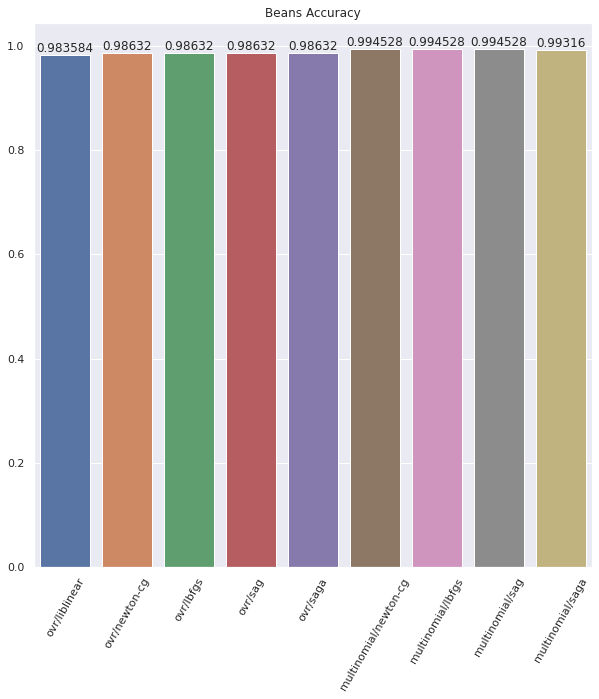

In [33]:
# *** Grafico ***
fig = plt.figure(figsize=(10,10))
splot = sns.barplot(x=params, y=scores)
splot.set_title('Beans Accuracy')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

Escogemos el modelo

In [34]:
#*** Instancio ****
model = logistic_model(1, 'newton-cg', 'multinomial')

#*** ENtreno ****
model.fit(x_train, y_train)

#*** Predicción ****
predictions = model.predict(x_test)

#*** Matriz de confusión y accuracy ***
print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


Matriz de confusión

In [36]:
# *** Creo Matriz ***
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

<Figure size 792x792 with 0 Axes>

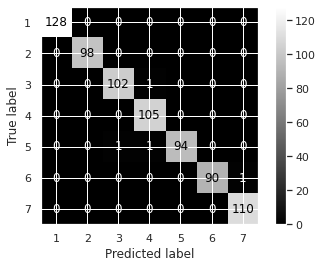

In [37]:
# *** Gráfico ***

fig = plt.figure(figsize=(11,11))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)

disp.plot(cmap='gray')

plt.show()